In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_c_2_n = 106./16.

In [2]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

#case,machine_target='OM4p5_CORE2_IAF_COBALT_abio_csf_mle200','gfdl.ncrc4-intel16-prod'

case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-013022','gfdl.ncrc4-intel19-prod'


In [3]:
short_casename=case.replace('OM4p5_CORE2_IAF_','')
short_casename

'gzCOBALT-121520'

In [4]:
phyto_varlist = ['di', 'smp', 'lgp']
zoo_varlist = ['smz', 'mdz', 'lgz']
#zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [5]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-121520


In [6]:
# read in files
diagTypes = ['ocean_cobalt_tracers_int'] 
var_list = ['tunicate_200']

pp_dates='198801-200712'

files=[glob(tmpdir + '.'.join(['/ocean_cobalt_tracers_int*',pp_dates,v,'nc'])) for v in var_list]

In [7]:
grid_file=tmpdir+'/ocean_static.nc'
ds=xr.open_mfdataset(files, combine='by_coords')
grid=xr.open_dataset(grid_file)

In [8]:
ds = ds.isel(time=slice(108,240))

In [9]:
palmerLTER=(ds.tunicate_200 * carbon_molar_mass * 1000).where(grid.geolon <= -64).where(grid.geolon > -73).where(grid.geolat <= -64).where(grid.geolat >= -68)

In [10]:
BATS=(ds.tunicate_200 * carbon_molar_mass * 1000).where(grid.geolon <= -62).where(grid.geolon >= -64).where(grid.geolat <= 32).where(grid.geolat >= 30)

In [11]:
import pandas as pd
palmerdf = palmerLTER.to_dataframe().dropna()
batsdf = BATS.to_dataframe().dropna()

In [12]:
palmerdf

tunicate_200
time                yh         xh                  
1997-01-16 12:00:00 -67.963645 -72.75     87.621750
                               -72.25     98.489822
                               -71.75    111.664276
                               -71.25    123.598907
                               -70.75    134.271713
...                                             ...
2007-12-16 12:00:00 -64.113587 -66.25     14.941740
                               -65.75     23.061266
                               -65.25     29.488253
                               -64.75     29.718527
                               -64.25     28.813696

[38148 rows x 1 columns]

In [13]:
palmerdf.index

MultiIndex([(1997-01-16 12:00:00, -67.96364453042091, -72.75),
            (1997-01-16 12:00:00, -67.96364453042091, -72.25),
            (1997-01-16 12:00:00, -67.96364453042091, -71.75),
            (1997-01-16 12:00:00, -67.96364453042091, -71.25),
            (1997-01-16 12:00:00, -67.96364453042091, -70.75),
            (1997-01-16 12:00:00, -67.96364453042091, -70.25),
            (1997-01-16 12:00:00, -67.96364453042091, -69.75),
            (1997-01-16 12:00:00, -67.96364453042091, -69.25),
            (1997-01-16 12:00:00, -67.96364453042091, -68.75),
            (1997-01-16 12:00:00, -67.96364453042091, -68.25),
            ...
            (2007-12-16 12:00:00, -64.11358687114387, -68.75),
            (2007-12-16 12:00:00, -64.11358687114387, -68.25),
            (2007-12-16 12:00:00, -64.11358687114387, -67.75),
            (2007-12-16 12:00:00, -64.11358687114387, -67.25),
            (2007-12-16 12:00:00, -64.11358687114387, -66.75),
            (2007-12-16 12:00:00, -64.1

In [14]:
batsdf

tunicate_200
time                yh        xh                  
1997-01-16 12:00:00 30.239665 -63.75     13.465969
                              -63.25     13.021398
                              -62.75     12.656522
                              -62.25     13.211735
                    30.670676 -63.75     13.247891
...                                            ...
2007-12-16 12:00:00 31.526940 -62.25     18.473448
                    31.952162 -63.75     22.472105
                              -63.25     20.406038
                              -62.75     19.146345
                              -62.25     19.013693

[2640 rows x 1 columns]

In [15]:
palmerdf_pivot=palmerdf.reset_index(['xh','yh'])
palmerdf_pivot

,yh,xh,tunicate_200
time,,,
1997-01-16 12:00:00,-67.963645,-72.75,87.621750
1997-01-16 12:00:00,-67.963645,-72.25,98.489822
1997-01-16 12:00:00,-67.963645,-71.75,111.664276
1997-01-16 12:00:00,-67.963645,-71.25,123.598907
1997-01-16 12:00:00,-67.963645,-70.75,134.271713
...,...,...,...
2007-12-16 12:00:00,-64.113587,-66.25,14.941740
2007-12-16 12:00:00,-64.113587,-65.75,23.061266
2007-12-16 12:00:00,-64.113587,-65.25,29.488253


In [16]:
palmerdf_pivot.index = palmerdf_pivot.index.to_datetimeindex()
palmerdf_pivot.index

DatetimeIndex(['1997-01-16 12:00:00', '1997-01-16 12:00:00',
               '1997-01-16 12:00:00', '1997-01-16 12:00:00',
               '1997-01-16 12:00:00', '1997-01-16 12:00:00',
               '1997-01-16 12:00:00', '1997-01-16 12:00:00',
               '1997-01-16 12:00:00', '1997-01-16 12:00:00',
               ...
               '2007-12-16 12:00:00', '2007-12-16 12:00:00',
               '2007-12-16 12:00:00', '2007-12-16 12:00:00',
               '2007-12-16 12:00:00', '2007-12-16 12:00:00',
               '2007-12-16 12:00:00', '2007-12-16 12:00:00',
               '2007-12-16 12:00:00', '2007-12-16 12:00:00'],
              dtype='datetime64[ns]', length=38148, freq=None)

In [17]:
batsdf_pivot=batsdf.reset_index(['xh','yh'])
batsdf_pivot

,yh,xh,tunicate_200
time,,,
1997-01-16 12:00:00,30.239665,-63.75,13.465969
1997-01-16 12:00:00,30.239665,-63.25,13.021398
1997-01-16 12:00:00,30.239665,-62.75,12.656522
1997-01-16 12:00:00,30.239665,-62.25,13.211735
1997-01-16 12:00:00,30.670676,-63.75,13.247891
...,...,...,...
2007-12-16 12:00:00,31.526940,-62.25,18.473448
2007-12-16 12:00:00,31.952162,-63.75,22.472105
2007-12-16 12:00:00,31.952162,-63.25,20.406038


In [18]:
batsdf_pivot.index = batsdf_pivot.index.to_datetimeindex()
batsdf_pivot.index

DatetimeIndex(['1997-01-16 12:00:00', '1997-01-16 12:00:00',
               '1997-01-16 12:00:00', '1997-01-16 12:00:00',
               '1997-01-16 12:00:00', '1997-01-16 12:00:00',
               '1997-01-16 12:00:00', '1997-01-16 12:00:00',
               '1997-01-16 12:00:00', '1997-01-16 12:00:00',
               ...
               '2007-12-16 12:00:00', '2007-12-16 12:00:00',
               '2007-12-16 12:00:00', '2007-12-16 12:00:00',
               '2007-12-16 12:00:00', '2007-12-16 12:00:00',
               '2007-12-16 12:00:00', '2007-12-16 12:00:00',
               '2007-12-16 12:00:00', '2007-12-16 12:00:00'],
              dtype='datetime64[ns]', length=2640, freq=None)

In [19]:
import seaborn as sns

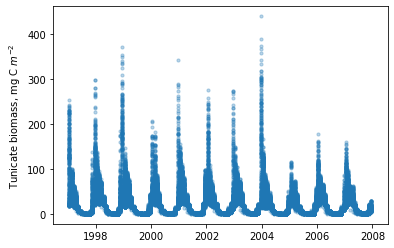

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(palmerdf_pivot.index, palmerdf_pivot.tunicate_200, alpha=0.3, s=10)
plt.ylabel('Tunicate biomass, mg C $m^{-2}$')
plt.savefig('plots/'+short_casename+'_'+pp_dates+'_palmerLTER_tunicates.png', dpi=150, bbox_inches='tight')

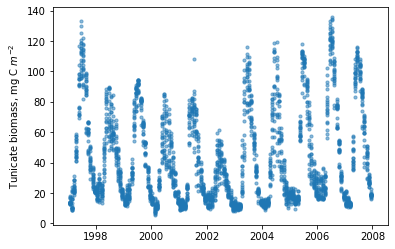

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(batsdf_pivot.index, batsdf_pivot.tunicate_200, alpha=0.5, s=10)
plt.ylabel('Tunicate biomass, mg C $m^{-2}$')
plt.savefig('plots/'+short_casename+'_'+pp_dates+'_BATS_tunicates.png', dpi=150, bbox_inches='tight')